<a href="https://colab.research.google.com/github/Juliennnd/Cataract_Detection_Project/blob/main/Classification_project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from PIL import Image

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of healthy eyes images in train directory: 153
Number of cataract eyes images in train directory: 298
Number of healthy eyes images in validation directory: 51
Number of cataract eyes images in validation directory: 120


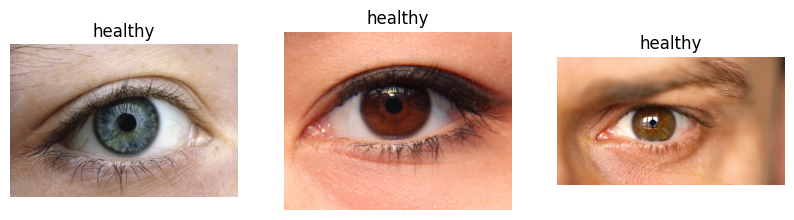

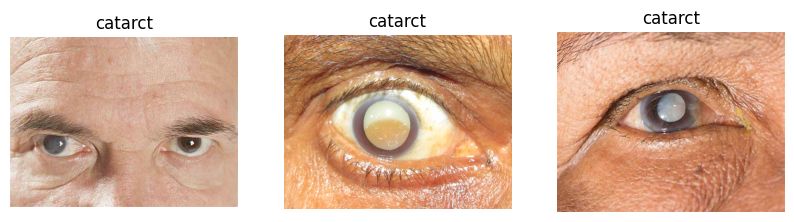

In [ ]:
# Define the path to the folder containing the labeled images

train_data_dir ='/content/drive/MyDrive/Dataset_Project/Training_set'
testing_data_dir = '/content/drive/MyDrive/Dataset_Project/Testing_set'


healthy_dir = os.path.join(train_data_dir, 'healthy_eye')
cataract_dir = os.path.join(train_data_dir, 'cataract_eye')

# Count the number of images per class
healthy_count_train = len(os.listdir(os.path.join(train_data_dir, 'healthy_eye')))
cataract_count_train = len(os.listdir(os.path.join(train_data_dir, 'cataract_eye')))

healthy_count_testing = len(os.listdir(os.path.join(testing_data_dir, 'healthy_eye')))
cataract_count_testing = len(os.listdir(os.path.join(testing_data_dir, 'cataract_eye')))


print("Number of healthy eyes images in train directory:", healthy_count_train)
print("Number of cataract eyes images in train directory:", cataract_count_train)

print("Number of healthy eyes images in validation directory:", healthy_count_testing)
print("Number of cataract eyes images in validation directory:", cataract_count_testing)


# Plot 3 cat images
fig = plt.figure(figsize=(10,10))
for i in range(3):
    healthy_file = os.listdir(healthy_dir)[i]
    healthy_path = os.path.join(healthy_dir, healthy_file)
    healthy_img = Image.open(healthy_path)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(healthy_img)
    ax.axis('off')
    ax.set_title('healthy')

# Plot 3 catarct images
fig = plt.figure(figsize=(10,10))
for i in range(3):
    catarct_file = os.listdir(cataract_dir)[i]
    catarct_path = os.path.join(cataract_dir, catarct_file)
    catarct_img = Image.open(catarct_path)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(catarct_img)
    ax.axis('off')
    ax.set_title('catarct')

plt.show()

In [11]:

# Define the path to the folder containing the labeled images
train_data_dir ='/content/drive/MyDrive/Dataset_Project/Training_set'
validation_data_dir = '/content/drive/MyDrive/Dataset_Project/Testing_set'

# Define image parameters
img_width, img_height = 416, 416
input_shape = (img_width, img_height, 3)

# Define batch size and number of epochs
batch_size = 16 # à changer
epochs = 50

# Define data augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Define training and validation generators
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

# Train the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

# Save the model
save_path = '/content/drive/MyDrive/Dataset_Project/CNN_model2.h5'
model.save(save_path)



Found 451 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


<ipython-input-11-d601aa929a1e>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
29/29 [==============================] - 293s 10s/step - loss: 0.9927 - accuracy: 0.6696 - val_loss: 0.5305 - val_accuracy: 0.7018
Epoch 2/50
29/29 [==============================] - 264s 9s/step - loss: 0.7312 - accuracy: 0.6652 - val_loss: 0.5124 - val_accuracy: 0.8421
Epoch 3/50
29/29 [==============================] - 293s 10s/step - loss: 0.2280 - accuracy: 0.9135 - val_loss: 0.2029 - val_accuracy: 0.9064
Epoch 4/50
29/29 [==============================] - 286s 10s/step - loss: 0.1797 - accuracy: 0.9335 - val_loss: 0.1015 - val_accuracy: 0.9708
Epoch 5/50
29/29 [==============================] - 277s 10s/step - loss: 0.1007 - accuracy: 0.9734 - val_loss: 0.1008 - val_accuracy: 0.9591
Epoch 6/50
29/29 [==============================] - 268s 9s/step - loss: 0.2409 - accuracy: 0.9645 - val_loss: 0.0813 - val_accuracy: 0.9649
Epoch 7/50
29/29 [==============================] - 294s 10s/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.1060 - val_accuracy: 0.9415
Epoch 8/

Found 171 images belonging to 2 classes.


<ipython-input-30-914348a85e45>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)


11/11 [==============================] - 30s 2s/step


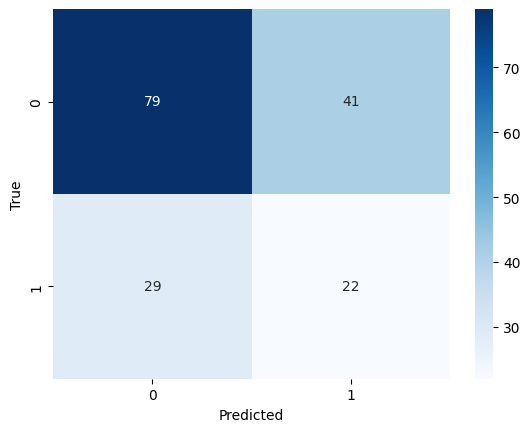

              precision    recall  f1-score   support

cataract_eye       0.73      0.66      0.69       120
 healthy_eye       0.35      0.43      0.39        51

    accuracy                           0.59       171
   macro avg       0.54      0.54      0.54       171
weighted avg       0.62      0.59      0.60       171



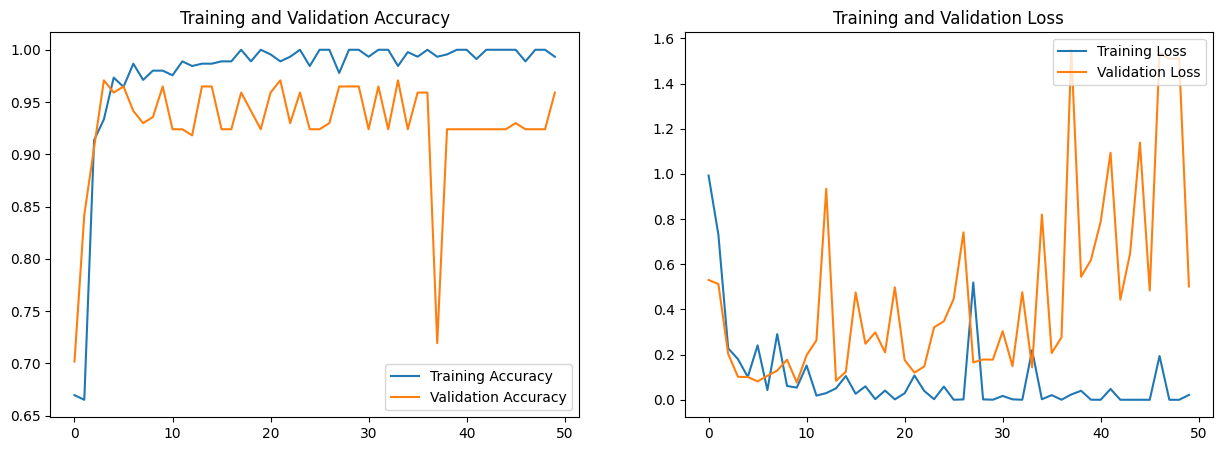

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

validation_data_dir = '/content/drive/MyDrive/Dataset_Project/Testing_set'
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
# Predict classes
y_pred = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)
y_pred = np.where(y_pred > 0.5, 1, 0) # This is because our model is binary, so we consider anything > 0.5 to be class 1, otherwise it's class 0

# Extract true classes
y_true = validation_generator.classes

# Generate confusion matrix
matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Generate classification report
report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices)
print(report)


# Plot the accuracy and loss over epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [26]:
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset_Project/CNN_model.h5')

# Define the path to the image you want to classify
img_path = '/content/drive/MyDrive/Dataset_Project/Application/oeil2.jpg'

# Load the image and resize it to match the input size of the model
img = image.load_img(img_path, target_size=(416, 416))

# Convert the image to a numpy array and normalize its values
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make a prediction using the model and print the result
prediction = model.predict(x)
if prediction[0][0] < 0.5:
    print('Cataract')
else:
    print('No cataract')


1/1 [==============================] - 0s 205ms/step
No cataract


Found 19 images belonging to 2 classes.
2/2 [==============================] - 5s 338ms/step - loss: 2.2676 - accuracy: 0.7895
validation loss: 2.2675797939300537
validation accuracy: 0.7894737124443054


<ipython-input-13-513067a5281d>:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)


2/2 [==============================] - 3s 322ms/step
              precision    recall  f1-score   support

 No cataract       0.58      0.58      0.58        12
    Cataract       0.29      0.29      0.29         7

    accuracy                           0.47        19
   macro avg       0.43      0.43      0.43        19
weighted avg       0.47      0.47      0.47        19



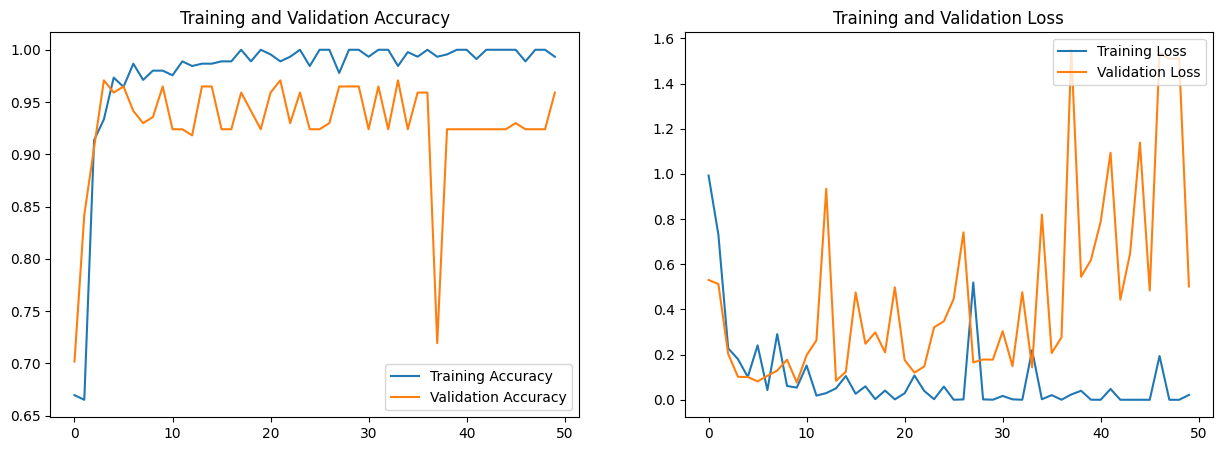

In [13]:
from sklearn.metrics import classification_report

img_width, img_height = 416, 416
input_shape = (img_width, img_height, 3)

# Define batch size and number of epochs
batch_size = 16 # à changer
epochs = 50
# Evaluate the model on the test set

validation_data_dir2 = '/content/drive/MyDrive/Dataset_Project/Dataset_Maria/Testing_set'
validation_datagen2 = ImageDataGenerator(rescale=1./255)

validation_generator2 = validation_datagen2.flow_from_directory(
        validation_data_dir2,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
        
loss, accuracy = model.evaluate(validation_generator2)
print('validation loss:', loss)
print('validation accuracy:', accuracy)

# Get the predictions for the test set
validation_generator2.reset()
preds = model.predict_generator2(validation_generator2, steps=len(validation_generator2), verbose=1)
y_true = validation_generator2.classes
y_pred = np.round(preds)

print(classification_report(y_true, y_pred, target_names=['No cataract', 'Cataract']))

# Plot the accuracy and loss over epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


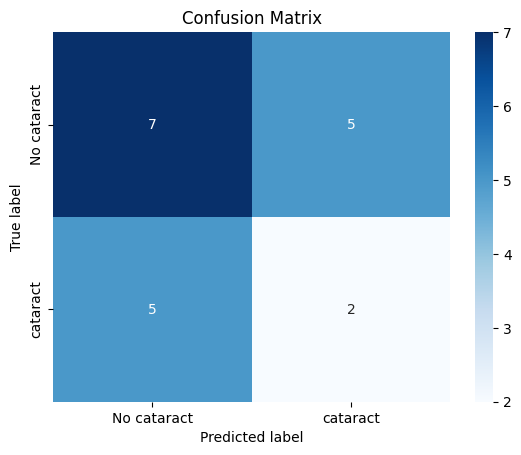

In [14]:
# create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create labels for the classes
class_names = ['No cataract', 'cataract']

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# set axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')

# set title
plt.title('Confusion Matrix')

# show the plot
plt.show()

